In [1]:
#installing and importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.calibration import CalibratedClassifierCV, calibration_curve


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Stars.csv to Stars.csv


about the dataset
source : kaggle


Star Type Classification

For comparing all models of ML

It can be used for prediction

Temperature -- K

L -- L/Lo (relative luminosity)

R -- R/Ro (relative radius)

AM -- Mv (absolue magnitude)

Color -- General Color of Spectrum

Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types

Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants,
Hyper Giants

TARGET:

Type

from 0 to 5

Red Dwarf - 0

Brown Dwarf - 1

White Dwarf - 2

Main Sequence - 3

Super Giants - 4

Hyper Giants - 5

In [8]:
df = pd.read_csv('Stars.csv')
df.head(100)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


<Axes: >

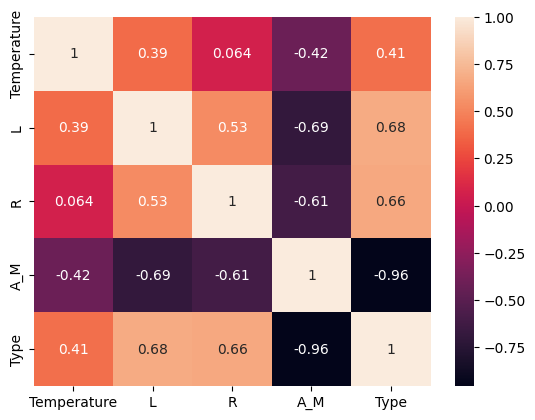

In [9]:
sns.heatmap(df[['Temperature','L','R','A_M','Type']].corr(), annot = True)

what this tells us :

Temperature vs L(0.39): moderate positive (hotter stars are more luminous)

Temperature vs R(0.064):almost no correlation

Temperature vs A_M(-0.42):negative correlation(hotter stars are brighter)

L vs A_M(-0.69):negative correlation(more luminous stars are brighter)

L vs R(0.53):positive correlation(more luminosity more the radius)

EDA - bivariate analysis

<Axes: xlabel='Temperature', ylabel='L'>

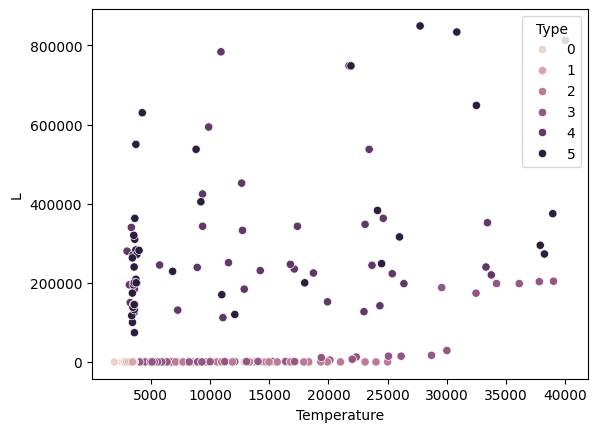

In [10]:
sns.scatterplot(x="Temperature", y="L", hue="Type", data=df)

<Axes: xlabel='R', ylabel='L'>

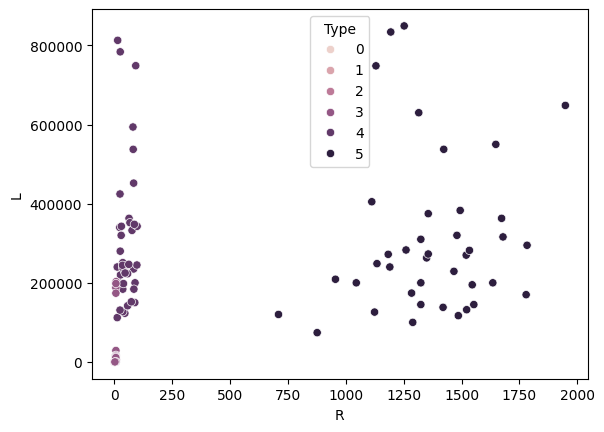

In [11]:
sns.scatterplot(x="R", y="L", hue="Type", data=df)

scaling and preprocessing


In [12]:
x = df[["Temperature",'L']]
y = df["Type"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.7793821 , -0.59862356],
       [-0.78210961, -0.59862357],
       [-0.82847728, -0.59862357],
       [-0.80749644, -0.59862357],
       [-0.89781898, -0.59862357],
       [-0.80330027, -0.59862357],
       [-0.82459583, -0.59862357],
       [-0.82847728, -0.59862357],
       [-0.82323207, -0.59862357],
       [-0.81798686, -0.59862357],
       [-0.72357305, -0.59862355],
       [-0.77298294, -0.5986235 ],
       [-0.77245842, -0.59862357],
       [-0.72063573, -0.59862354],
       [-0.82323207, -0.59862357],
       [-0.75084815, -0.59862355],
       [-0.80760134, -0.59862356],
       [-0.71392186, -0.59862355],
       [-0.76637397, -0.59862355],
       [-0.74025282, -0.59862335],
       [ 1.52137764, -0.59862326],
       [-0.2892695 , -0.59862357],
       [-0.34381971, -0.59862357],
       [-0.20954228, -0.59862357],
       [ 0.62969162, -0.5986235 ],
       [ 0.26147775, -0.59862357],
       [-0.20219898, -0.59862357],
       [-0.29346567, -0.59862357],
       [ 0.13559266,

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

training a random forest classifier for our preporcessed data

In [15]:
#initializing
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#training
rf.fit(x_train,y_train)
#predicting
y_pred_rf = rf.predict(x_test)
#checking accuracy
print("RF accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RF accuracy: 0.7708333333333334
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       0.50      0.50      0.50         8
           5       0.64      0.64      0.64        11

    accuracy                           0.77        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.77      0.77      0.77        48



obseravtions of rf accuracy report:

overall accuracy : 0.77 (guesses 3 out of 4 stars correctly)

classes 2 and 3 show clear seperation - captures HR relationships well
classes 1 and 2 are strong but not perfect
classes 4 and 5 show overlapping

we can apply svm and try comapring with rf to see if margins(shortest distance between observations and treshold) improve seperation between classes

In [16]:
svc = SVC(probability = True, random_state = 42)
svc_calibrated = CalibratedClassifierCV(svc, cv='prefit')
svc.fit(x_train,y_train)
svc_calibrated.fit(x_train,y_train)
y_pred_svc = svc_calibrated.predict(x_test)


/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


let us evaluate the performance using a confusion matrix

Text(50.722222222222214, 0.5, 'actual')

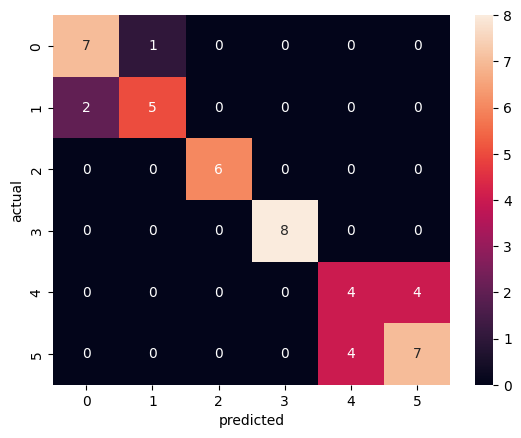

In [17]:
#confusion matrix for rf
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

Class 0: 7 correct, 1 misclassified as Class 1 → strong, ~88% accuracy.

Class 1: 5 correct, 2 misclassified as Class 0 → decent, ~71% accuracy.

Class 2: 6 correct, 0 misclassified → perfect, 100%.

Class 3: 8 correct, 0 misclassified → perfect, 100%.

Class 4: 4 correct, 4 misclassified as Class 5 → 50%, model struggles with Class 4 vs 5 confusion.

Class 5: 7 correct, 4 misclassified as Class 4 → ~64%, some confusion with Class 4.

Text(50.722222222222214, 0.5, 'actual')

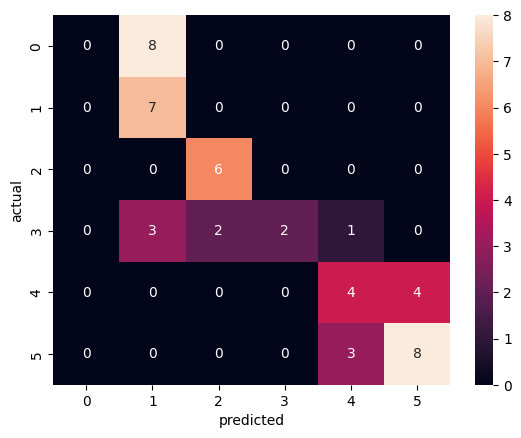

In [18]:
#confusion matrix for svc
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

Class 0: 0 correct, all misclassified as 1 → model struggles completely.

Class 1: 7/7 correct → perfect classification.

Class 2: 6/6 correct → perfect classification.

Class 3: 2 correct, 6 misclassified → poor performance.

Class 4: 4 correct, 4 misclassified as 5 → 50% accuracy.

Class 5: 8 correct, 3 misclassified as 4 → decent, ~73% accuracy.

SVC vs RF Strengths:

SVC is very accurate on Classes 1, 2, and 5.

RF is much stronger on Classes 0 and 3.

Weaknesses:

Both models struggle with Class 4 vs 5 confusion.

SVC fails completely on Class 0.



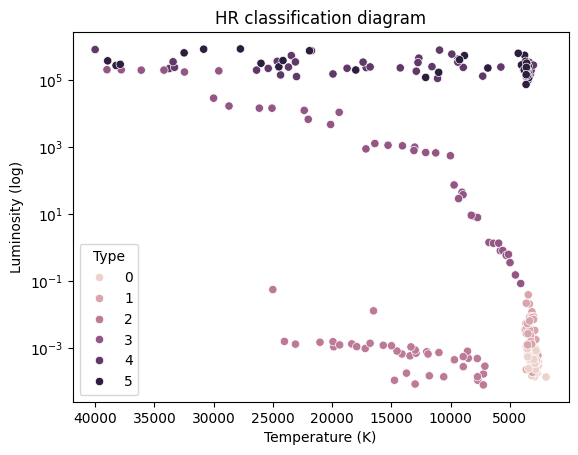

In [22]:
#The Hertzsprung–Russell (HR) diagram
sns.scatterplot(x='Temperature',y='L',hue='Type' , data=df)
plt.yscale('log')
plt.gca().invert_xaxis() #temp high to low, HR diagram convention
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (log)')
plt.title('HR classification diagram')
plt.show()


from 0 to 5

Red Dwarf - 0

Brown Dwarf - 1

White Dwarf - 2

Main Sequence - 3

Super Giants - 4

Hyper Giants - 5

this is a diagram of the life cycle of a star for reference


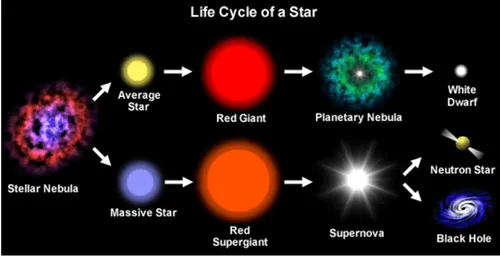

The Hertzsprung–Russell (HR) diagram is super important in astronomy and for our project because it visualizes the relationship between a star’s temperature and luminosity

this visually backs up our confusion matrix

classes 1 and 2 are seperated to

classes 2 and 3 are well seperated

classes 4 and 5 are overlapping

# model calibration
model calibration is the process of tweaking/calibrating an ml model to return the true likelihood of an event rather than just the label or class
one of the methods is platt-scaling, which is already donw

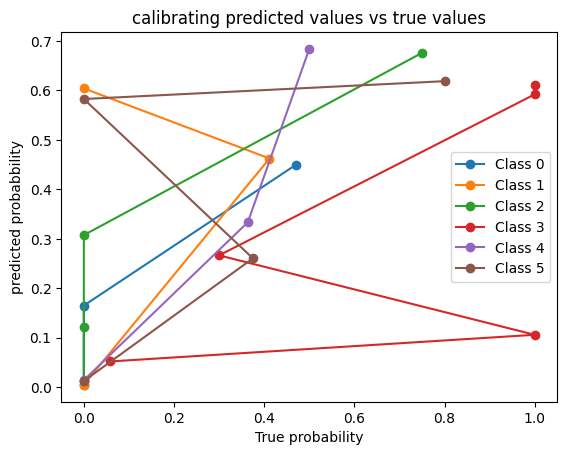

In [20]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5])
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
  prob_true, prob_predicted = calibration_curve(y_test_bin[:,i],svc_calibrated.predict_proba(x_test)[:,i],n_bins= 10)
  plt.plot(prob_true,prob_predicted,marker='o', label=f"Class {i}")

plt.xlabel('True probability')
plt.ylabel('predicted probabbility')
plt.legend()
plt.title('calibrating predicted values vs true values')
plt.show()


In [21]:
from sklearn.metrics import brier_score_loss
# Get probabilities from calibrated classifier
y_prob = svc_calibrated.predict_proba(x_test)
brier = np.mean([brier_score_loss(y_test_bin[:,i], y_prob[:,i]) for i in range(n_classes)])
print("Multi-class Brier score:", brier)

Multi-class Brier score: 0.08670528201542183


The Support Vector Classifier (SVC) with Platt Scaling calibration achieved a multi-class Brier score of ~0.087, which is quite low, indicating that the predicted probabilities are well calibrated. Although the calibration plots appear jagged due to limited data per class and binning effects, the numerical score confirms that the model’s probability estimates are reliable.

This means that the classifier is not only making accurate predictions, but also assigning probabilities that closely reflect the true likelihood of each class. In real-world applications, such well-calibrated models are especially valuable for decision-making under uncertainty, such as astronomy (star classification), medical diagnostics, or any field where the confidence of predictions matters as much as the predictions themselves.